# Peer-graded Assignment: Identifying trends in share prices

Excel File also available on: https://notebooks.azure.com/meetneil/projects/myadhocnotebooks

__Refer to this file for plots required under #2 of assignment__

Assignment instructions:

1. Upload the completed spreadsheet that includes the 4 month MA values as well as the RS measure for each stock and the S&P 500 index.
2. Upload your graphs that show 4 month MA along with actual prices for AAPL, GE, Boeing and S&P 500 index.

First, let's import the requisite libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Let's Load the file and read first few rows

In [2]:
stocks = pd.read_excel('Identifying_Momentum_Data.xlsx', header=1, index_col=0)
stocks.head(10)

,AAPL,GE,BOEING,S&P 500,AAPL.1,GE.1,BOEING.1,S&P 500.1,AAPL.2,GE.2,BOEING.2
2011-12-09,52.699112,15.252862,64.735634,1257.599976,NaN,NaN,NaN,NaN,0.041905,0.012129,0.051476
2012-01-03,59.397751,15.934174,65.468163,1312.410034,NaN,NaN,NaN,NaN,0.045259,0.012141,0.049884
2012-02-01,70.582985,16.367229,66.537041,1365.680054,NaN,NaN,NaN,NaN,0.051683,0.011985,0.048721
2012-03-01,78.014206,17.243586,66.022148,1408.469971,65.173513,16.199463,65.690747,1336.040009,0.055389,0.012243,0.046875
2012-04-02,75.988213,16.822592,68.179390,1397.910034,70.995789,16.591895,66.551686,1371.117523,0.054358,0.012034,0.048772
2012-05-01,75.174957,16.401596,62.159180,1310.329956,74.940090,16.708751,65.724440,1370.597504,0.057371,0.012517,0.047438
2012-06-01,75.990822,18.108381,66.347183,1362.160034,76.292050,17.144039,65.676975,1369.717499,0.055787,0.013294,0.048707
2012-07-02,79.472862,18.030178,65.998924,1379.319946,76.656714,17.340687,65.671169,1362.429993,0.057617,0.013072,0.047849
2012-08-01,86.933533,17.995420,64.139938,1406.579956,79.393044,17.633894,64.661306,1364.597473,0.061805,0.012794,0.045600
2012-09-04,87.176598,19.883972,62.522961,1440.670044,82.393454,18.504488,64.752251,1397.182495,0.060511,0.013802,0.043399


We need to drop all columns after S&P 500

In [3]:
stocks = stocks.iloc[1:,:4]

Next, formatting index

In [4]:
stocks.index = pd.DatetimeIndex(stocks.index)
stocks.index = stocks.index.date

Finally, we'll change dataframe values to numpy.float32

In [5]:
stocks = stocks.astype(np.float32)

### Creating Moving Average and Relative Strength Index vis-a-vis

In [6]:
'''4 months Moving Average'''
moving_avg = stocks.rolling(window=4).mean().dropna()
moving_avg.index = pd.DatetimeIndex(moving_avg.index)

##### plotting the moving averages

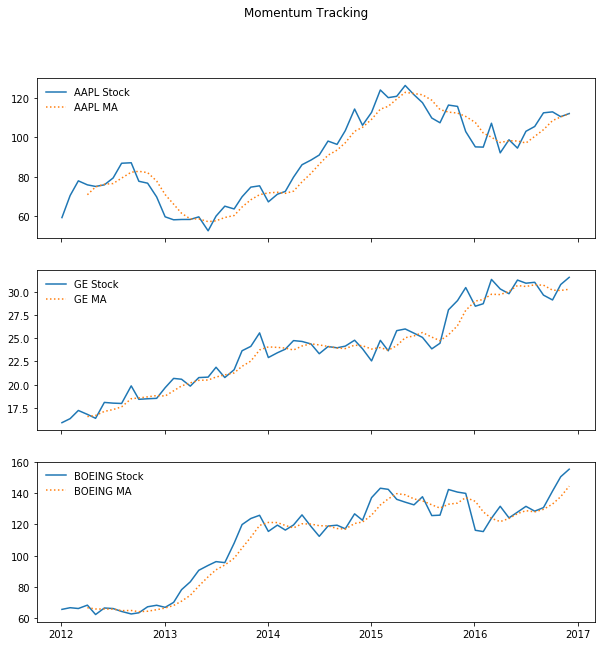

In [7]:
fig, axs = plt.subplots(3, sharex=True, figsize=(10, 10))                        # Defining plot parameters as to, no. of plots, size etc.
fig.suptitle('Momentum Tracking')                                                # Plot title
axs[0].plot(stocks.index, stocks['AAPL'], label='AAPL Stock')                    # Plot AAPL stock price line graph
axs[0].plot(moving_avg.index, moving_avg['AAPL'], label='AAPL MA', linestyle=':')# Plot AAPL 4-Mth Moving Average line graph
axs[0].legend(title=None, frameon=False)                                         # Legends
axs[1].plot(stocks.index, stocks['GE'], label='GE Stock')                        # Plot GE stock price line graph
axs[1].plot(moving_avg.index, moving_avg['GE'], label='GE MA', linestyle=':')    # Plot GE 4-Mth Moving Average line graph
axs[1].legend(title=None, frameon=False)                                         # Legends
axs[2].plot(stocks.index, stocks['BOEING'], label='BOEING Stock')                # Plot BOEING stock price line graph
axs[2].plot(moving_avg.index, moving_avg['BOEING'], label='BOEING MA', linestyle=':') # Plot BOEING 4-Mth Moving Average line graph
axs[2].legend(title=None, frameon=False)                                         # Legend
plt.show()                                                                       

3. Pick a security and examine the instances where the MA series and price series cross each other. 
    * Is the stock likely to increase when the price crosses the MA? 
    * Does it matter whether the price crosses the MA from above or below?
    
One of the oldest and tested ways to represent trend of a price series is to use its moving average (MA).

The simple MA involves taking an n-day rolling mean of a price of interest.

The understanding is that if the crossovers of the price series and the MA series is the indicator of change in trend. Precisely, if the crossover happens from 'below', i.e., when the spread between the price series and the MA series changes from (-) to +, that is an indication of bullish trend; and _vice versa_.

We shall examine this notion through the following analysis.
    
We shall first Create a crossover indicator:

In [8]:
'''Concatnating the datadrame for AAPL stock'''
AAPL = pd.concat((stocks['AAPL'], moving_avg['AAPL']), axis=1).dropna()
AAPL.columns = ['close', 'MA']
AAPL.head()

,close,MA
2012-04-02,75.988213,70.995789
2012-05-01,75.174957,74.940090
2012-06-01,75.990822,76.292049
2012-07-02,79.472862,76.656713
2012-08-01,86.933533,79.393044


In [9]:
'''Previous day\'s close'''
previousMA = AAPL['MA'].shift(1)
previousAP = AAPL['close'].shift(1)

In [10]:
'''Crossover dates'''
crossover = ((AAPL['MA']<=AAPL['close'])&(previousMA>=previousAP))|((AAPL['MA'] >= AAPL['close'])&(previousMA <= previousAP))

The following are the crossover prices, followed by its graph

In [11]:
print('There are %2d instances of crossover for the AAPL stock during the selected period' % len(AAPL.loc[crossover[crossover==True].index,:]))
AAPL.loc[crossover[crossover==True].index,:]

There are 16 instances of crossover for the AAPL stock during the selected period


,close,MA
2012-06-01,75.990822,76.292049
2012-07-02,79.472862,76.656713
2012-10-01,77.796387,82.844845
2013-05-01,59.776257,58.743680
2013-06-03,52.705132,57.349140
2013-07-01,60.148418,57.773829
2014-01-02,67.368050,71.908461
2014-03-03,72.663933,71.693367
2015-06-01,121.626511,122.240271
2015-10-01,116.400833,112.824411


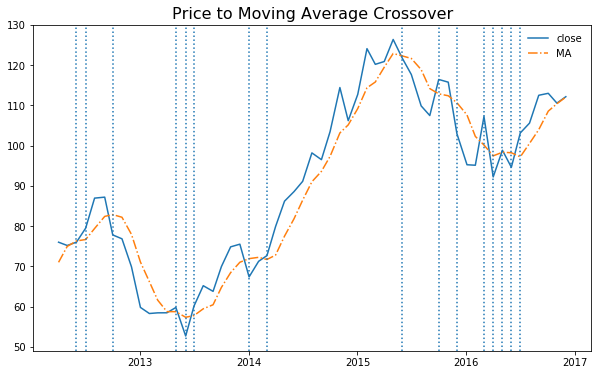

In [12]:
'''Visualizing the crossovers'''
plt.figure(figsize=(10,6))
plt.plot(AAPL['close'])
plt.plot(AAPL['MA'], linestyle='-.', label='MA')
for i in AAPL[crossover == True].index.tolist():
    plt.axvline(x=i, linestyle=':')
plt.legend(frameon=False, title=None, loc='best')
plt.title('Price to Moving Average Crossover', fontdict={'fontsize': 16, 'fontweight': 500})
plt.show()

Observations:
1. Strong bullish trends: Jun'12, Jul'13, Mar'14, Jul'16
2. Strong Bearish trends: Jul'12, Jun'15
3. Signal strength of rest of the crossovers was not so conclusive
4. A slight lag is observed across the crossover signals. (This could be addressed by using EMA or EWMA instead of just SimpleMA)

Inference:

Simple Moving Average is time tested method of observing trends but independently it's not enough, one may want to measure strength of the signal as well.<br>
Other signals like Relative Strength index must be exploited for ex-ante signals.


4. Pick one security and upload a graph that plots a relative strength over the sample period.

In [13]:
'''Relative Strength Index'''
rsi = stocks.iloc[:,:-1].div(other=stocks.iloc[:,-1], axis='rows')

In [14]:
rsi.index = pd.DatetimeIndex(rsi.index)

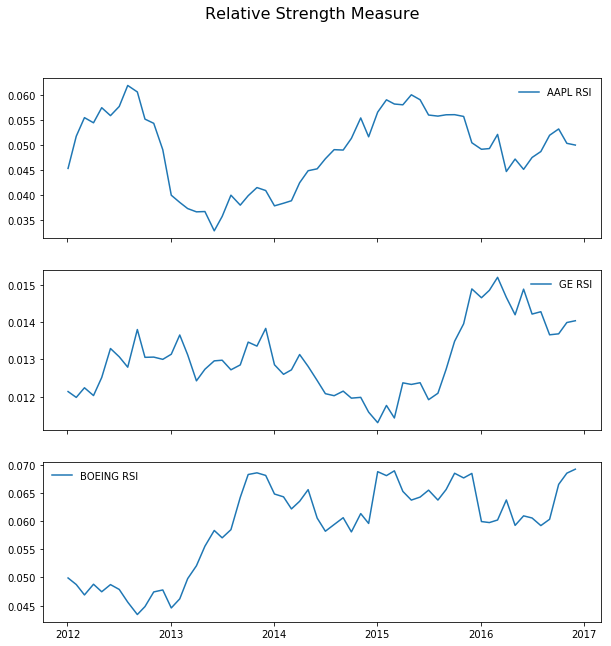

In [28]:
fig, axs = plt.subplots(3, sharex=True, figsize=(10, 10))                        # Defining plot parameters as to, no. of plots, size etc.
fig.suptitle('Relative Strength Measure', fontsize=16)                                                # Plot title
axs[0].plot(rsi.index, rsi['AAPL'], label='AAPL RSI')
axs[0].legend(title=None, frameon=False)                                         # Legends
axs[1].plot(rsi.index, rsi['GE'], label='GE RSI')
axs[1].legend(title=None, frameon=False)                                         # Legends
axs[2].plot(rsi.index, rsi['BOEING'], label='BOEING RSI')
axs[2].legend(title=None, frameon=False)                                         # Legend
plt.show()                                                                       

5. For the security that you have picked, find all instances in which its relative strength measure (RSM) increases by more than 10 bps. and all those instances in which its relative strength drops by more than 10 bps. 
    * Is the stock price more or less likely to outperform the S&P in the subsequent two months when its RSM has increased?
    * Is the stock more or less likely to underperform when its RSM has decreased?
    * Does RSM persist?
    
As we've calculated in the accompanying Excel file, RSM is a ratio of price of a (AAPL/ GM/ Boeing) stock to S&P 500 index.

It indicates strong performers compared to overall market.

When used as part of momentum strategy, relative strength assumes a stock whose price has been rising will continue to rise and _vice versa_.

Conversly, when RSM signal weakens, perhaps, it indicates the momentum is about to end and a good time to sell.

With the following visualization, we will test whether this notion is true for our data or not. 

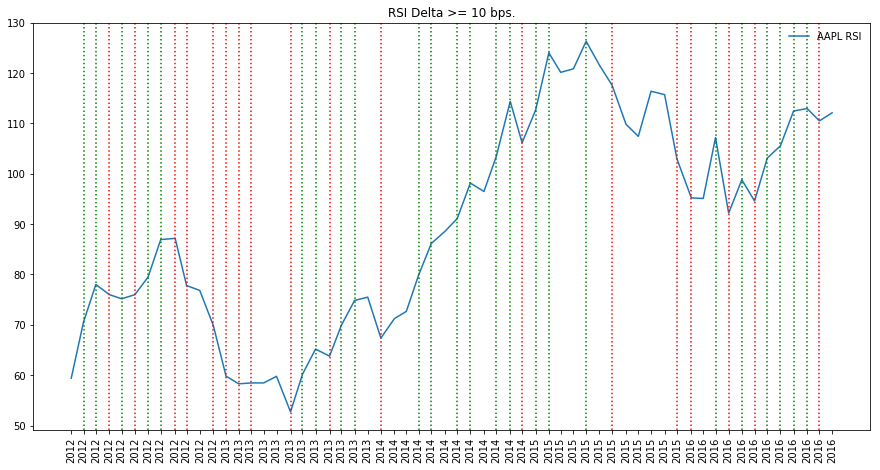

In [46]:
'''Selecte Delta RSM >= or <= 10 bps'''
rise10bps = rsi.loc[rsi['AAPL'].diff() >= 0.001,'AAPL']
fall10bps = rsi.loc[rsi['AAPL'].diff() <= -0.001, 'AAPL']

'''Visualize the RSM against the price of AAPL stock'''
plt.figure(figsize=(15,7.5))
plt.plot(stocks.index, stocks['AAPL'], label='AAPL RSI')
for i in rise10bps.index.tolist():
    plt.axvline(x=i, linestyle=':', color='g')
for j in fall10bps.index.tolist():
    plt.axvline(j, linestyle=':', color='r')
plt.legend(title=None, frameon=False, loc='best')
plt.title('RSI Delta >= 10 bps.')
plt.xticks(ticks=rsi.index.tolist(), rotation=90)
plt.show()

Observations:
1. RSM too are not cloclusive by themselves in that trends are not always consistent; sure, there are several instances in which trends are consistent. For instance, a persistant downward trend is observed for the period Dec'12 through Mar'13. Likewise, an upward trend persist for the period Apr'14 through Nov'14.
2. RSM unlike SMA is timely (i.e., no lag in signal) This is evndent from the graph, where RSM Delta >= 10 bps is observed usually around kink in prices.
3. Perhaps, RSM Delta >= 20 bps would be even more decisive?

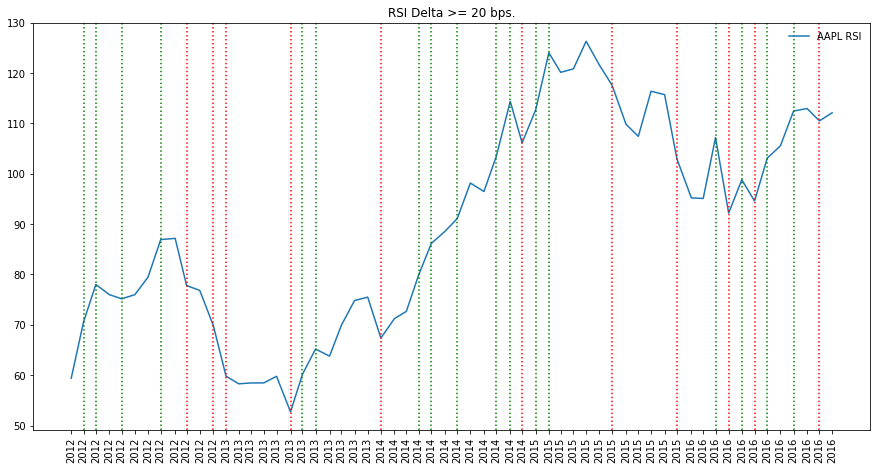

In [48]:
'''Selecte Delta RSM >= or <= 10 bps'''
rise10bps = rsi.loc[rsi['AAPL'].diff() >= 0.002,'AAPL']
fall10bps = rsi.loc[rsi['AAPL'].diff() <= -0.002, 'AAPL']

'''Visualize the RSM against the price of AAPL stock'''
plt.figure(figsize=(15,7.5))
plt.plot(stocks.index, stocks['AAPL'], label='AAPL RSI')
for i in rise10bps.index.tolist():
    plt.axvline(x=i, linestyle=':', color='g')
for j in fall10bps.index.tolist():
    plt.axvline(j, linestyle=':', color='r')
plt.legend(title=None, frameon=False, loc='best')
plt.title('RSI Delta >= 20 bps.')
plt.xticks(ticks=rsi.index.tolist(), rotation=90)
plt.show()

Much better, signals stand out and show more persistance.

We can thus infer, the stronger the RSM signal, the better it indicates the trend.